### Healthcare Analytics Project Work
- Using DE-SynPUF files downloaded from https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/DE_Syn_PUF.html
- Predicting which outpatients are at high risk of being admitted to hospital for Chronic Heart Failure.

In [34]:
# import and read file, use NaN for elements with no values
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_csv("project_modeling_bal_data.csv", na_values = ['no info', '.'])
#print(df.head(5))

In [35]:
df.shape

(57768, 30)

In [36]:
print(df.columns)

Index(['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', 'BENE_SEX',
       'SP_STATE_CODE_0', 'SP_STATE_CODE_1', 'SP_STATE_CODE_2',
       'SP_STATE_CODE_3', 'BENE_RACE_CD_0', 'BENE_RACE_CD_1', 'BENE_RACE_CD_2',
       'Age', 'HF_label'],
      dtype='object')


In [37]:
df_model = df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', 'BENE_SEX',
       'SP_STATE_CODE_0', 'SP_STATE_CODE_1', 'SP_STATE_CODE_2',
       'SP_STATE_CODE_3', 'BENE_RACE_CD_0', 'BENE_RACE_CD_1', 'BENE_RACE_CD_2',
       'Age', 'HF_label']]
df_model.head()

,1,2,3,4,5,6,7,8,9,10,...,BENE_SEX,SP_STATE_CODE_0,SP_STATE_CODE_1,SP_STATE_CODE_2,SP_STATE_CODE_3,BENE_RACE_CD_0,BENE_RACE_CD_1,BENE_RACE_CD_2,Age,HF_label
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,71,0
1,0,4,1,0,0,1,1,0,0,3,...,1,0,0,1,0,0,1,0,62,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,74,0
3,0,0,10,1,2,0,16,1,1,3,...,1,0,0,1,1,0,0,1,79,0
4,0,0,0,0,0,0,1,0,0,2,...,0,0,0,1,1,0,0,1,69,0


## Naive Bayes Model with Balanced Classes

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
df_model['HF_label'].value_counts()

1    28884
0    28884
Name: HF_label, dtype: int64

In [10]:
# split data for test/train
X = df_model.drop(['HF_label'], axis=1)
y = df_model['HF_label']

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [11]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
#instantiate the standard scalar (make a StandardScaler object)
X= StandardScaler()
# pass to object X_train, compute mean and std for each value in data set
# fit yourself to this, transform and save to X_train, fit computes mean/std
X_train = X.fit_transform(X_train)
#don't fit on test set, only have one sample at a time, don't have all instances that it
#will see over lifetime of model
X_test = X.transform(X_test)
#print(X_test)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\barba\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\barba\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [12]:
#Fitting Classifier to Training Set.
#Gaussian is parameter-less
from sklearn.naive_bayes import GaussianNB
classifierObj = GaussianNB()
classifierObj.fit(X_train, y_train)
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print('Kfold Acc: {0:0.4f}'.format(modelAccuracies.mean()))
print('Kfold Std: {0:0.4f}'.format(modelAccuracies.std()))

Acc: 0.5520
Std: 0.0104


Confusion matrix:
 [[4994 3647]
 [3959 4731]]


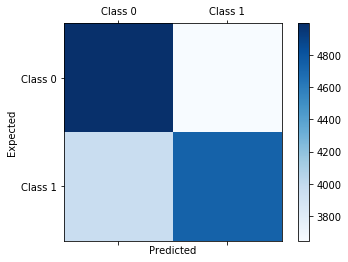

In [13]:
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [14]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('recall: {0:0.2f}'.format(recall))
print('precision: {0:0.2f}'.format(precision))

recall: 0.54
precision: 0.56


GaussianNB: f1=0.554 auc=0.592


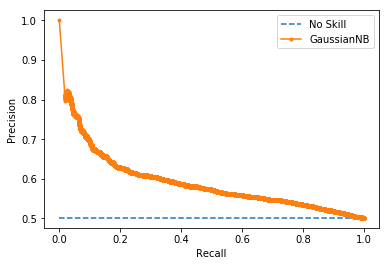

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# predict probabilities
lr_probs = classifierObj.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = classifierObj.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('GaussianNB: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='GaussianNB')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
GaussianNB: ROC AUC=0.589


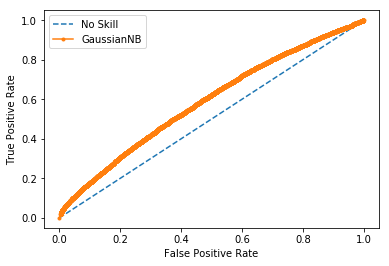

In [16]:
# now that classes are balanced, look at ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifierObj.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GaussianNB: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='GaussianNB')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Naive Bayes Model with Imbalanced Classes

In [17]:
df_unbal = pd.read_csv("project_modeling_imbal_data.csv", na_values = ['no info', '.'])

In [18]:
df_unbal.shape
print(df.columns)

Index(['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', 'BENE_SEX',
       'SP_STATE_CODE_0', 'SP_STATE_CODE_1', 'SP_STATE_CODE_2',
       'SP_STATE_CODE_3', 'BENE_RACE_CD_0', 'BENE_RACE_CD_1', 'BENE_RACE_CD_2',
       'Age', 'HF_label'],
      dtype='object')


In [19]:
df_model_unbal = df_unbal[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', 'BENE_SEX',
       'SP_STATE_CODE_0', 'SP_STATE_CODE_1', 'SP_STATE_CODE_2',
       'SP_STATE_CODE_3', 'BENE_RACE_CD_0', 'BENE_RACE_CD_1', 'BENE_RACE_CD_2',
       'Age', 'HF_label']]
df_model_unbal.head()

,1,2,3,4,5,6,7,8,9,10,...,BENE_SEX,SP_STATE_CODE_0,SP_STATE_CODE_1,SP_STATE_CODE_2,SP_STATE_CODE_3,BENE_RACE_CD_0,BENE_RACE_CD_1,BENE_RACE_CD_2,Age,HF_label
0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,85,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,72,0
2,0,0,0,0,2,0,1,0,0,0,...,0,0,0,1,0,0,1,0,65,0
3,0,0,2,0,0,1,1,0,1,1,...,1,0,0,1,1,0,1,0,88,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,70,0


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
df_model_unbal['HF_label'].value_counts()

0    1580361
1      28884
Name: HF_label, dtype: int64

In [21]:
# split data for test/train
X = df_model_unbal.drop(['HF_label'], axis=1)
y = df_model_unbal['HF_label']

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
#instantiate the standard scalar (make a StandardScaler object)
X= StandardScaler()
# pass to object X_train, compute mean and std for each value in data set
# fit yourself to this, transform and save to X_train, fit computes mean/std
X_train = X.fit_transform(X_train)
#don't fit on test set, only have one sample at a time, don't have all instances that it
#will see over lifetime of model
X_test = X.transform(X_test)
#print(X_test)

C:\Users\barba\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\barba\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\barba\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [23]:
#Fitting Classifier to Training Set.
#Gaussian is parameter-less
from sklearn.naive_bayes import GaussianNB
classifierObj = GaussianNB()
classifierObj.fit(X_train, y_train)
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print('Kfold Acc: {0:0.4f}'.format(modelAccuracies.mean()))
print('Kfold Std: {0:0.4f}'.format(modelAccuracies.std()))

Kfold Acc: 0.9523
Kfold Std: 0.0007


Confusion matrix:
 [[306042  10056]
 [  5342    409]]


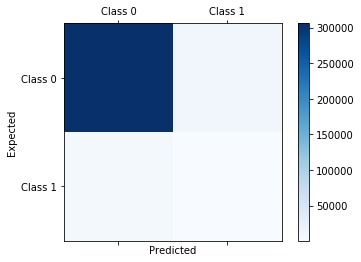

In [24]:
#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [25]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('recall: {0:0.2f}'.format(recall))
print('precision: {0:0.2f}'.format(precision))

recall: 0.07
precision: 0.04


GaussianNB: f1=0.050 auc=0.032


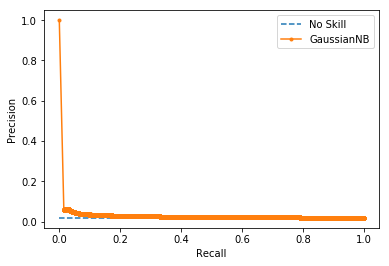

In [26]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# predict probabilities
lr_probs = classifierObj.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = classifierObj.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('GaussianNB: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='GaussianNB')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
GaussianNB: ROC AUC=0.574


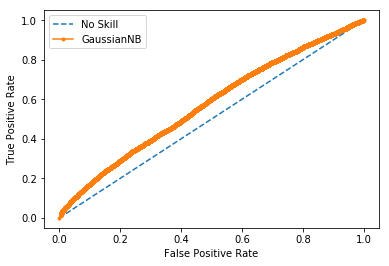

In [27]:
# now that classes are balanced, look at ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifierObj.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('GaussianNB: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='GaussianNB')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Random Forest with Balanced Class

In [39]:
# split data for test/train
X = df_model.drop(['HF_label'], axis=1)
y = df_model['HF_label']
#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)

# Try random forest model
#from sklearn.ensemble import RandomForestClassifier
classifierObj2 = RandomForestClassifier(n_estimators=10, criterion='gini', bootstrap=False)
classifierObj2.fit(X_train,y_train)
grid_param= {  
    'n_estimators': [15, 25, 50],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
#from sklearn.model_selection import GridSearchCV
gd_sr= GridSearchCV(estimator=classifierObj2, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
gd_sr.fit(X_train, y_train) 
print(gd_sr.best_params_) 
print(gd_sr.best_score_)
# grid search results {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 10} score: 0.682652136395948

{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 50}
0.5634938299082524


In [40]:
# Try random forest model
from sklearn.ensemble import RandomForestClassifier
classifierObj2 = RandomForestClassifier(n_estimators=50, criterion='gini', bootstrap=False)
classifierObj2.fit(X_train,y_train)
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj2, X=X_train, y=y_train, cv=10)
print(modelAccuracies.mean())
print(modelAccuracies.std())

0.5591414876182742
0.007455197575602448


Confusion matrix:
 [[5152 3489]
 [4112 4578]]


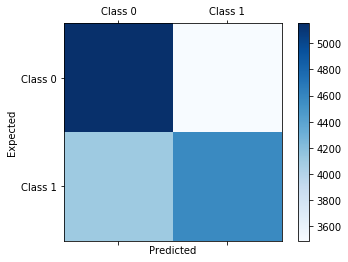

In [41]:
#Making predictions on the Test Set
y_pred= classifierObj2.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [42]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print('recall: {0:0.2f}'.format(recall))
print('precision: {0:0.2f}'.format(precision))

recall: 0.53
precision: 0.57


RandomForest: f1=0.546 auc=0.579


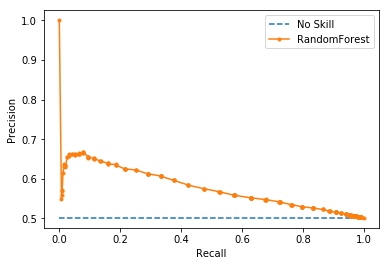

In [43]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# predict probabilities
lr_probs = classifierObj2.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = classifierObj2.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('RandomForest: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RandomForest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()